# Orthogonal Learning

# Simulation Design 1


In [1]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

In [2]:
#Set seed
np.random.seed(123)
B = 50
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [3]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

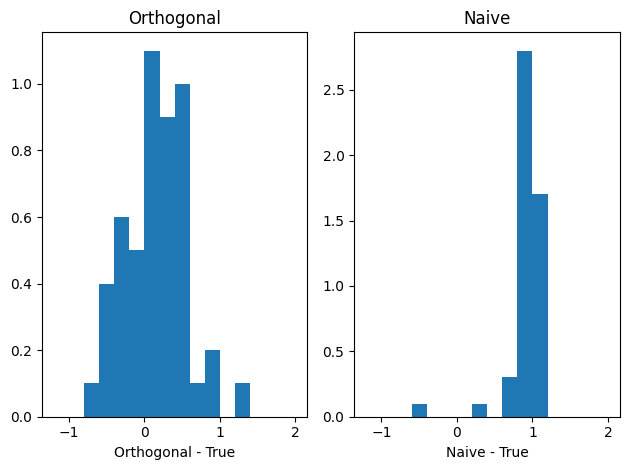

In [6]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orthogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

plt.show()

# Simulation Design 2

In [7]:
# Set seed
np.random.seed(123)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [8]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

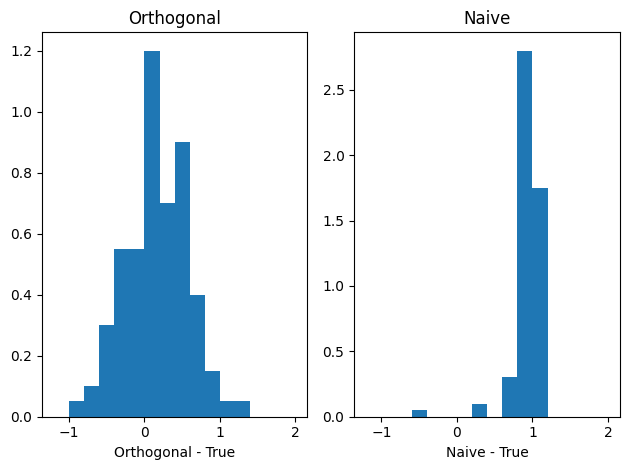

In [11]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orthogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

plt.show()

# Simulation Design 3

In [14]:
# Set seed
np.random.seed(123)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [ ]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 5*D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

Text(0.5, 0, 'Naive - True')

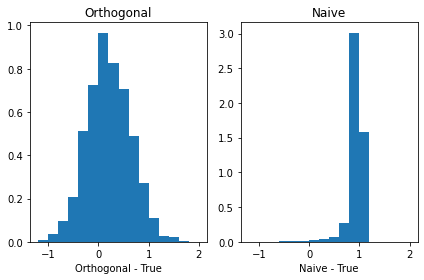

In [10]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 5 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 5, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orthogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

# Question 1

It is observed that the largest distribution of estimated betas for the Orthogonal case (double-lasso method) are close to the true value of 0 and as the number of trials increases the distribution tends to a normal distribution. On the contrary, for the Naive method, despite the fact that, as the trials are increased, most of the estimated betas have a value close to 1, which shows that the estimator is biased. 

In this case the coefficient of D is 5, therefore, the estimated values of the coefficient of D for both methods should be centered on this value (to construct the graph we subtract 5, to have it centered on 0).

# Question 2

\begin{equation}\label{decompose}
Y =  \alpha D+\gamma'W+\epsilon
\end{equation}

$$
D= \partial_n \alpha(\gamma'_{DW},\gamma'_{YW})=0
$$

$$
M(a,\eta)= E [(\tilde Y(\gamma'_{DW}) -a \tilde D(\gamma'_{YW}))\tilde D(\gamma'_{YW})] = 0    
$$


Where Neyman Orthogonality tells us that alpha is not sensitive to changes in the previously estimated parameters and this is achieved by performing the two Lasso stages where we first remove everything related to w in Y and in the second stage everything related to w in D. Since in the Naive method the second Lasso stage is omitted our estimator D will be related to W so the M equation is not satisfied. 

The selection of the Naive method would not entail problems if we are sure that D is totally random. However, in the problem it is stated that D depends on X so it is necessary to apply the double Lasso method.


# 2. Testing the Convergence Hypothesis

### Double Lasso Method 

We use the double lasso approach when we have a high dimensional setting and we want to select variables to include in our regression. This will help us to avoid inflated Type I errors. The objective is to find covariates that can predict the independent and dependent variable. For example, we have this equation:
$$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$

$Y$ = rates of economic growth

$D$ = Initial wealth levels for each country

$W$ = controls for each country (country's institutional, educational, and other similar characteristics)

In this example we have 90 countries($n$) and 60 controls($p$), so the ratio $p/n$ is not small and we need to use the Double Lasso method. This consist in three steps:
- First, we run the regressions between the dependent variable  ($Y$) and the variable ($W$), where all the controls are. Also we run a regression between the independent variable $D$ and $W$. 
- From this two regressions we obtain the residuals for the first estimation ($\check{Y_i}$=$Y_i$-$\hat{\gamma}_{YW}$$W_i$) and second one($\check{D_i}$=$D_i$-$\hat{\gamma}_{DW}$$W_i$)
- Finally, the last step is to obtain the estimator $\check{\alpha}$ by using OLS method between $\check{Y_i}$, as the dependent variable, and $\check{D_i}$, as the independent one.

We will use different methods to testing the Convergence Hypothesis:
- OLS
- Double LASSO using cross Validation
- Double Lasso using theoretical Lambda
- Double Lasso using method="partialling out"

First, we will begin with the OLS, and we will see that the estimation by using this method will give us a noisy estimate with high standard error.

In [16]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random

## OLS

In [17]:
# I downloaded the data that the author used
growth_read = pyreadr.read_r("../data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

In [18]:
growth.shape

(90, 63)

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', 1)

<ipython-input-20-8ba339c4a057>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = growth.drop('Outcome', 1)


In [21]:
# OLS regression
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           0.000200
Time:                        17:42:08   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

In [22]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

In [23]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1_pandas.index = [ "OLS" ]

table_1_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.0706,0.051844


### Double LASSO using cross Validation (Sklearn)

In [24]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D = growth['gdpsh465']

<ipython-input-24-fd57fb07bc70>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  W = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )


In [25]:
import random
import math

n=len(Y)
# Set Seed
# to make the results replicable (generating random numbers)
np.random.seed(0)
random = np.random.randint(0,n, size=math.floor(n))
growth["random"] = random
random

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88, 81, 37, 25, 77, 72,  9, 20, 80, 69, 79, 47, 64, 82, 88,
       49, 29, 19, 19, 14, 39, 32, 65,  9, 57, 32, 31, 74, 23, 35, 75, 55,
       28, 34,  0,  0, 36, 53,  5, 38, 17, 79,  4, 42, 58, 31,  1, 65, 41,
       57, 35, 11, 46, 82,  0, 14, 53, 12, 42, 84, 75, 68,  6, 68, 47,  3,
       76, 52, 78, 15, 20])

In [26]:
data_2 = growth.sort_values(by=['random'])
data_2.head()

,Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1,random
73,0.141445,1,7.511525,0.1053,0.228424,0.029328,0.103,0.139,0.054,1.00,...,1.700,2.369,1.060,51.7,37.1,0.0903,0.1229,484.00,0.007257,0
53,0.000408,1,7.880804,0.2927,0.248714,0.036270,0.177,0.172,0.140,1.00,...,0.724,0.758,0.690,29.1,22.6,0.1526,0.1976,8.57,-0.030185,0
54,-0.015680,1,7.301148,0.1621,0.299252,0.037367,0.078,0.104,0.054,0.75,...,0.405,0.430,0.381,53.3,18.0,0.1148,0.1244,2.50,-0.007018,0
65,0.066598,1,7.675082,0.0898,0.188016,0.045678,0.269,0.338,0.200,1.00,...,0.687,0.745,0.630,37.5,16.4,0.0906,0.0959,25.00,0.191066,1
84,0.031895,1,8.645586,0.0000,0.288440,0.005995,0.256,0.301,0.199,1.00,...,1.307,1.579,1.062,18.9,11.3,0.1296,0.1458,652.85,-0.046278,3


In [27]:
# Create training and testing sample 
train = data_2[ : math.floor(n*4/5)]    # training sample
test =  data_2[ math.floor(n*4/5) : ]   # testing sample
print(train.shape)
print(test.shape)

(72, 64)
(18, 64)


In [28]:
# Create main variables for training sample 
Y_t = train['Outcome']
W_t = train.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D_t = train['gdpsh465']

<ipython-input-28-20ccf58b7e46>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  W_t = train.drop(['Outcome','intercept', 'gdpsh465'], 1 )


In [29]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y_t - lasso_model.fit( W_t, Y_t ).predict( W_t )
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D_t - lasso_model.fit( W_t, D_t).predict( W_t )
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

C:\Users\hinte\anaconda3\envs\rtutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010861597607676597, tolerance: 1.963131075242785e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\hinte\anaconda3\envs\rtutorial\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0389908452306296, tolerance: 0.005980622645375027
  model = cd_fast.enet_coordinate_descent(


In [30]:
# Regress residuales
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()
partial_lasso_est = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

print( f"Coefficient for D via partialling-out using lasso (train sample) is {partial_lasso_est}" )

Coefficient for D via partialling-out using lasso (train sample) is -0.037999479022644125


In [31]:
# Create main variables for test sample 
Y_s = test['Outcome']
W_s = test.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D_s = test['gdpsh465']

<ipython-input-31-6b0ca34ca254>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  W_s = test.drop(['Outcome','intercept', 'gdpsh465'], 1 )


In [32]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']

In [33]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso  
table_2[0,1] = std_lasso   
table_2[0,2] = lower_ci_lasso
table_2[0,3] = upper_ci_lasso    


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "LASSO (CV)" ]

table_3 = table_1_pandas.append(table_2_pandas)
table_3

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO (CV),-0.037999,0.022736,-0.083333,0.007334


### Double Lasso using theoretical Lambda

In [34]:
res_Y_l = hdmpy.rlasso( W, Y, post=True ).est['residuals']
res_D_l = hdmpy.rlasso( W, D, post=True ).est['residuals']

r_Y_l = pd.DataFrame(res_Y_l, columns=['r_Y'])
r_D_l = pd.DataFrame(res_D_l, columns=['r_D'])

In [35]:
# OLS regression
reg_ols  = sm.OLS(r_Y_l, r_D_l).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    0.000533
Time:                        17:42:45   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso_l = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso_l = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso_l= reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso_l = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [38]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_l   
table_4[0,1] = std_lasso_l   
table_4[0,2] = lower_ci_lasso_l
table_4[0,3] = upper_ci_lasso_l    


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO (hdmpy)" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO (hdmpy),-0.049811,0.013858,-0.077347,-0.022276


In [39]:
table_5 = table_3.append(table_4_pandas)
table_5

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO (CV),-0.037999,0.022736,-0.083333,0.007334
LASSO (hdmpy),-0.049811,0.013858,-0.077347,-0.022276


### Double Lasso using method="partialling out"

In [40]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")
lasso_direct

{'alpha': -0.04981144483733839,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.04981144483733839,
 'coefficient': -0.04981144483733839,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
     

In [41]:
est_lasso_h = lasso_direct["coefficients"]
std_lasso_h = lasso_direct["se"]
lower_ci_lasso_h = est_lasso_h - 1.96*std_lasso_h
upper_ci_lasso_h = est_lasso_h + 1.96*std_lasso_h

In [42]:
est_lasso_h

-0.04981144483733839

In [43]:
std_lasso_h=list(std_lasso_h)

In [44]:
std_lasso_h=std_lasso_h[0]

In [45]:
std_lasso_h

0.015391328783055026

In [46]:
table_6 = np.zeros( (1, 4) )

table_6[0,0] = est_lasso_h   
table_6[0,1] = std_lasso_h  
table_6[0,2] = lower_ci_lasso_h 
table_6[0,3] = upper_ci_lasso_h     


table_6_pandas = pd.DataFrame( table_6, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_6_pandas.index = [ "LASSO_direct" ]
table_6_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_direct,-0.049811,0.015391,-0.079978,-0.019644


### Summary

In [47]:
table_7 = table_5.append(table_6_pandas)
table_7

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO (CV),-0.037999,0.022736,-0.083333,0.007334
LASSO (hdmpy),-0.049811,0.013858,-0.077347,-0.022276
LASSO_direct,-0.049811,0.015391,-0.079978,-0.019644


In [48]:
data = pd.DataFrame({'variable':['OLS','LASSO(CV)','HDMPY', 'HDMPY_direct'], 'coefficient':[est_ols,est_lasso,est_lasso_l,est_lasso_h], 'std_error':[std_ols, std_lasso,std_lasso_l, std_lasso_h]})

In [49]:
data

,variable,coefficient,std_error
0,OLS,-0.009378,0.029888
1,LASSO(CV),-0.037999,0.022736
2,HDMPY,-0.049811,0.013858
3,HDMPY_direct,-0.049811,0.015391


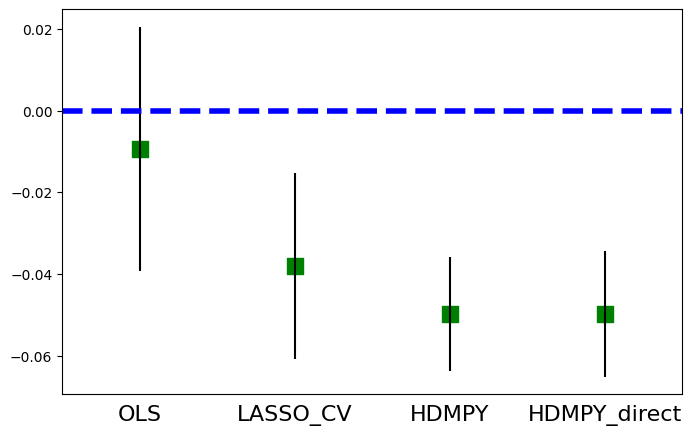

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
data.plot(x='variable', y='coefficient', kind='bar', 
             ax=ax, color='none', 
             yerr='std_error', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(data.shape[0]), 
           marker='s', s=120, 
           y=data['coefficient'], color='green')
ax.axhline(y=0, linestyle='--', color='blue', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['OLS','LASSO_CV','HDMPY','HDMPY_direct'], 
                       rotation=0, fontsize=16)

plt.show()

### Following the results of the graphic above, we can say that double lasso methods give us a more precised estimation. Especially, when we use hte method with the theoretical lambda (HDMPY). The method allow us to obtain a high quality estimation of $\beta_1$. 